# Object Detection - Graphical Degrading and Object Detection

## Steps for Part 1 - Graphical Degrading
1. Download zip code from assignment repository
1. Download the yolov3.weights from the readme in the github repository (This file is too big for github versioning)
1. Edit/Create an git "exclude" file in the main portfolio directory ".git/info".  Add "yolov3.weights" on a line by itself.  This avoids a git push failure due to the size of the file.
1. Fill in the missing code in this notebook  (You will need the working code examples to do the next step)
1. Create a python class that allows the following
   - Reads in the image
   - Create a loop that alters individual changes of the items below to determine names of identified objects and their confidence (down to when the object detetion is lost).  Remember to reset the image through each pass as they are not iterative.
     - size
     - rotation
     - noise (of your choice)
   - Graph the results
   
## Steps for Part 2 - Object Detection
1.  Generate a web interface python script that ingests a POST command of a picture Use [postman](https://www.postman.com/) to generate the post with picture of your choice.
1.  Returns the items detected and the assocated confidence
1.  Add to your python class above to offer this capability
1.  Test web interface locally
1.  Create a Dockerfile and build the image
1.  Test the Dockerfile locally
1.  Push notebook, python script, readme, etc to your github portfolio (since you are in the right location locally you just need to do a push at the main directory of the portfolio (after git add * and git commit -m " comment)
1.  Push locally built and test docker image to your docker hub portfolio.  Manually add to docker readme.
1.  Submit the two links (github Assignment5 directory and docker hub) via text submission to Canvas.

## Initial Start
* Load Libraries (Need to install wandb and cv2 - see below)
* plot_cv_image( img ) allows output of image within a notebook

In [1]:
!pip install numpy 
!pip install scikit-learn 
!pip install matplotlib
!pip install opencv-python-headless
!pip install wandb
!pip install scikit-image

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
from wandb import Classes


def plot_cv_img(input_image):     
    """     
    Converts an image from BGR to RGB and plots     
    """   
    # change color channels order for matplotlib     
    plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))          

    # For easier view, turn off axis around image     
    plt.axis('off') 
    
    # Must save prior to show - for show clears the image!
    plt.savefig("DetectionOutput.jpg")
    plt.show()

## Load Yolo Model

In [3]:
# load yolo
net = cv.dnn.readNet("yolov3.weights",  #note weights to too big for github must save within readme
                     "yolov3.cfg")

## Identify the number of layers in the model and their names

In [4]:
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

## Read in and print out the categories for Yolo

In [5]:
classes = []
with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

## Read in an image and output its dimensions

In [6]:
img = cv.imread('pictures/bermuda.jpg')
print("Original Shape: ", img.shape)

Original Shape:  (2229, 3344, 3)


## Resize the image and output its dimensions

In [7]:
img = cv.resize(img, (416, 416))  # Add code to resize
height, width, channel = img.shape
print("Resized Shape: ", img.shape)

Resized Shape:  (416, 416, 3)


## Rotate the image using cv

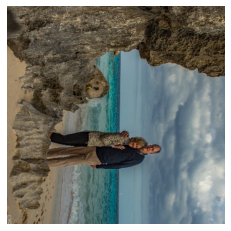

In [8]:
# Rotate
rotated_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)  # add code to rotate
plot_cv_img(rotated_img)

## Rotate the image using scipy (might have to install if necessary)

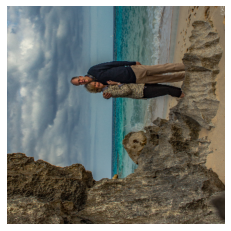

In [9]:
# Rotate
from scipy import ndimage
rotated_img = ndimage.rotate(img, 90, reshape=False) # add code to rotate
plot_cv_img(rotated_img)

## Add Salt and Pepper Noise

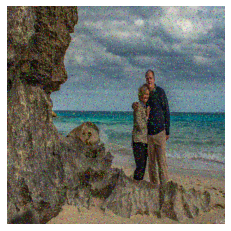

In [10]:
#add salt and pepper noise
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.

noise_img = random_noise(img, mode='s&p')  # add code to add salt and pepper noise
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]

noise_img = np.array(255*noise_img, dtype = 'uint8')

plot_cv_img(noise_img )

## Add Gaussian noise

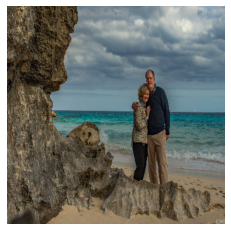

In [11]:
import numpy as np

mean = 0
var = 0.1
sigma = var**0.5
gauss = np.random.normal(mean, sigma, img.shape) # add code  to add gaussian noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = img + gauss  # Add the noise to the image
# Display the image
plot_cv_img(img_gauss)

## Add Speckle Noise with color

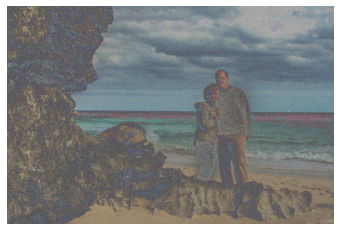

In [12]:
#Speckle Noise
import numpy as np
 
img = cv.imread('pictures/bermuda.jpg')
 
gauss = np.random.normal(0, 50, img.shape) # add code to add speckle noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
speckle_img = img + gauss
plot_cv_img(speckle_img )

## Set up layers and colors

In [13]:
layer_name = net.getLayerNames()
output_layer = [layer_name[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## Fire up Model

In [14]:
#img = cv.resize(img, (416, 416))  # Add code to resize

#note - 0.00392 = 1/250   416 is a standard square for yolo
blob = cv.dnn.blobFromImage(img, 1/255 , (416, 416), True, False)  # Fill in other fields to create image compatible with cv

#detect objects
net.setInput(blob)
outs = net.forward(output_layer)

## Set up image on screen  (all done for you)
* Note how to extract the identified objects and their assocated confidence.  You need that for part 2 of this assignment

Type:  <class 'list'>
[3 5]
Object: person with confidence of 1.00
Object: person with confidence of 0.99


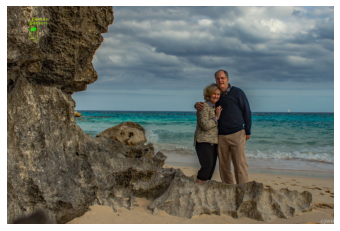

In [15]:
# Showing Information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detection
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            cv.circle(img, (center_x, center_y), 10, (0, 255, 0), 2 )
            
            # Reactangle Cordinate
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
           
print("Type: ", type(class_ids))

indexes = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

font = cv.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print(f'Object: {label} with confidence of {confidences[i]:.2f}')
        color = colors[i]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv.putText(img, label, (x, y + 30), font, 3, color, 3)

plot_cv_img(img)

Now that we have the base code above, we will make use of our class namely <b>ObjectDetection</b> to use a number of image variations built from the above types of distortions. We will use the following distortions

<ul>
    <li>Resize</li>
    <li>Random Noise</li>
    <li>Low Gaussian Noise</li>
    <li>Excessive Gaussian Noise</li>
    <li>Rotation Counter Clockwise 90 degrees</li>
    <li>Rotation Clockwise 90 degrees</li>
</ul>

In [16]:
from object_detection import ObjectDetection

objectdetection = ObjectDetection()

In [17]:
# First take the original image
img1 = 'pictures/bermuda.jpg'
class_dict1 = objectdetection.detect(img1)
cnt1 = (len(class_dict1))
mean1 = sum(n for _, n in class_dict1) / cnt1

# Scipy Random Noise
img2 = 'pictures/bermuda_random.jpg'
cv.imwrite(img2, noise_img)
class_dict2 = objectdetection.detect(img2)
cnt2 = (len(class_dict2))
mean2 = sum(n for _, n in class_dict2) / cnt2

# Gaussian Noise
img3 = 'pictures/bermuda_speckle.jpg'
img = cv.imread('pictures/bermuda.jpg')
gauss = np.random.normal(0, 50, img.shape) # add code to add speckle noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
speckle_img = img + gauss
cv.imwrite(img3, speckle_img)
class_dict3 = objectdetection.detect(img3)
cnt3 = (len(class_dict3))
mean3 =  0 if cnt3 ==0 else sum(n for _, n in class_dict3) / cnt3

# Gaussian Noise - Add more distortion
img4 = 'pictures/bermuda_speckle1.jpg'
img = cv.imread('pictures/bermuda.jpg')
gauss = np.random.normal(0, 250, img.shape) # add code to add speckle noise
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
speckle_img = img + gauss
cv.imwrite(img4, speckle_img)
class_dict4 = objectdetection.detect(img4)
cnt4 = (len(class_dict4))
mean4 = 0 if cnt4 ==0 else sum(n for _, n in class_dict4) / cnt4

# Scipy Rotation
img5 = 'pictures/bermuda_rotated270.jpg'
img = cv.imread('pictures/bermuda.jpg')
rotated_img = ndimage.rotate(img, 90, reshape=False) 
cv.imwrite(img5, rotated_img)
class_dict5 = objectdetection.detect(img5)
cnt5 = (len(class_dict5))
mean5 = 0 if cnt5 ==0 else sum(n for _, n in class_dict5) / cnt5

# Rotated Image
img6 = 'pictures/bermuda_rotated90.jpg'
img = cv.imread('pictures/bermuda.jpg')
rotated_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
cv.imwrite(img6, rotated_img)
class_dict6 = objectdetection.detect(img6)
cnt6 = (len(class_dict6))
mean6 = 0 if cnt6 ==0 else sum(n for _, n in class_dict6) / cnt6

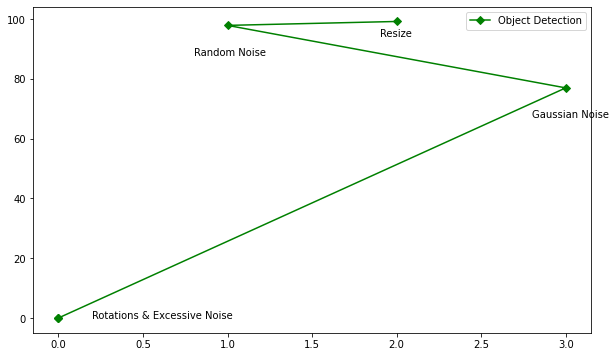

In [18]:
import matplotlib.pyplot as plt

# Let's get these into a list
cnt = [cnt1, cnt2, cnt3, cnt4, cnt5, cnt6]
mean = [mean1, mean2, mean3, mean4, mean5, mean6]
plt.figure(figsize=(10,6))

# Set text
plt.text(cnt1-0.1,mean1-5,'Resize')
plt.text(cnt2-0.2,mean2-10,'Random Noise')
plt.text(cnt3 - 0.2,mean3-10,'Gaussian Noise')
plt.text(cnt5 + 0.2 ,mean5,'Rotations & Excessive Noise')
plt.plot(cnt, mean, '-gD', markevery=[0,1,2,3,4,5], label='Object Detection')
plt.legend()

plt.show()

With the above sample we can see that rotations and noise affect the detectability but let's make this more iterative so we can see this in action clearly

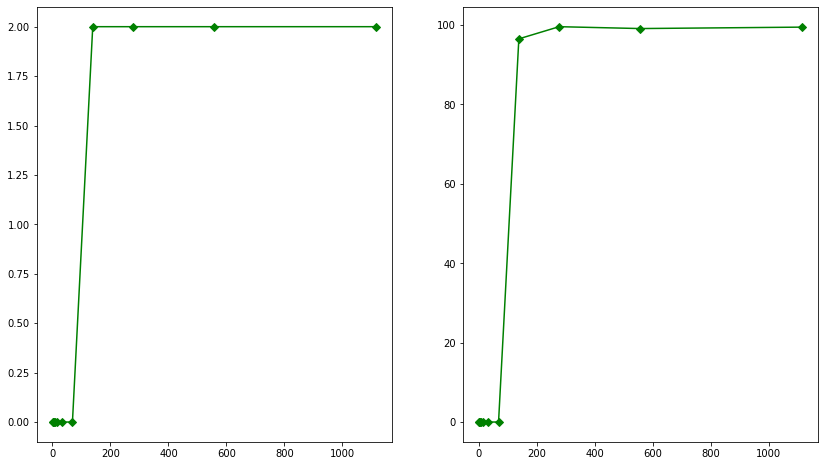

In [19]:
# Initialize a list of count & confidence tuples
resize_list = []
cnt_list = []
mean_list = []

# First let's test impact of resizing 
img = cv.imread('pictures/bermuda.jpg')
dim = int(min(img.shape[0],img.shape[1]))
while dim > 1:
    # Get the reduced dimension
    dim = int(dim / 2)
    
    # Read the image again 
    img = cv.imread('pictures/bermuda.jpg')
    
    # Resize the image based on the current reduction
    resized_img = cv.resize(img, (dim, dim)) 
    img_name = 'pictures/bermuda_resize_' + str(dim) + '.jpg'
    cv.imwrite(img_name, resized_img)
    
    # Detect objects on these resized image
    object_detections = objectdetection.detect(img_name)
    resized_cnt = (len(object_detections))
    resized_mean = 0 if resized_cnt ==0 else sum(n for _, n in object_detections) / resized_cnt
    
    # Add to the list
    resize_list.append(dim)
    cnt_list.append(resized_cnt)
    mean_list.append(resized_mean)

# Plot the values 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(np.array(resize_list), np.array(cnt_list), '-gD', label='Resizing & Objects Detected')
ax2.plot(np.array(resize_list), np.array(mean_list), '-gD', label='Resizing & Objects Detection Confidence')
plt.show()

From the above graph we can see that after the resizing drops to less than 139, the network is not able to detect any objects. Till that point, the confidence is high and number of objects detected (2 persons) is consistent

Now we will proceed to doing the same experiment with noise

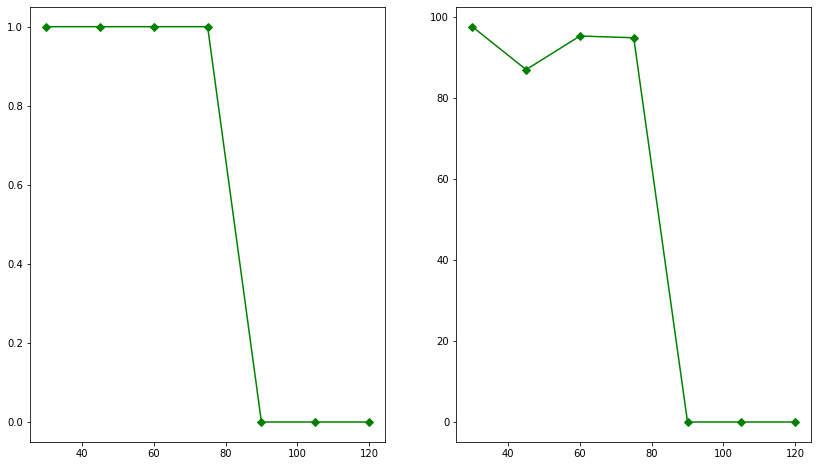

In [20]:
# Initialize a list of count & confidence tuples
rotation_list = []
cnt_list = []
mean_list = []

# First let's test impact of resizing 
img = cv.imread('pictures/bermuda.jpg')
deg = 15
while deg < 120:
    # Get the reduced dimension
    deg = deg + 15
    
    # Read the image again 
    img = cv.imread('pictures/bermuda.jpg')
    
    # Resize the image based on the current reduction
    rotated_img = ndimage.rotate(img, deg, reshape=False) # add code to rotate
    img_name = 'pictures/bermuda_rotate_' + str(deg) + '.jpg'
    cv.imwrite(img_name, rotated_img)
    
    # Detect objects on these resized image
    object_detections = objectdetection.detect(img_name)
    resized_cnt = (len(object_detections))
    resized_mean = 0 if resized_cnt ==0 else sum(n for _, n in object_detections) / resized_cnt
    
    # Add to the list
    rotation_list.append(deg)
    cnt_list.append(resized_cnt)
    mean_list.append(resized_mean)

# Plot the values 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(np.array(rotation_list), np.array(cnt_list), '-gD', label='Rotations & Objects Detected')
ax2.plot(np.array(rotation_list), np.array(mean_list), '-gD', label='Rotations & Objects Detection Confidence')
plt.show()

From above graphs we see that rotations before 90 degrees still lead to some object detection. However we also see that the slightest rotation reduces the number of objects detected from 2 to 1 leading to the conclusion that rotations have an immediate impact on the detection abilities

We will now finally proceed towards noise analysis

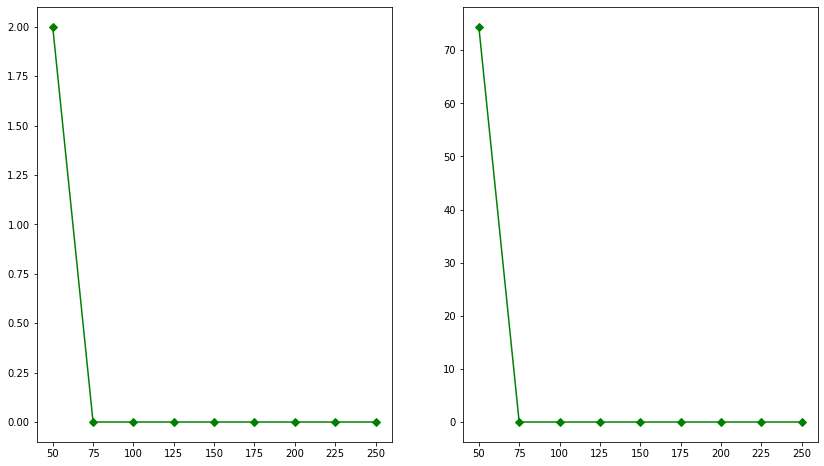

In [21]:
# Initialize a list of count & confidence tuples
noise_list = []
cnt_list = []
mean_list = []

# First let's test impact of resizing 
img = cv.imread('pictures/bermuda.jpg')
noise = 25
while noise < 250:
    # Get the new noise
    noise = noise + 25
    
    # Read the image again 
    img = cv.imread('pictures/bermuda.jpg')
    
    # Add noise to the image
    gauss = np.random.normal(0, noise, img.shape) # add code to add speckle noise
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    speckle_img = img + gauss
    img_name = 'pictures/bermuda_noise_' + str(noise) + '.jpg'
    cv.imwrite(img_name, speckle_img)
    
    # Detect objects on these resized image
    object_detections = objectdetection.detect(img_name)
    resized_cnt = (len(object_detections))
    resized_mean = 0 if resized_cnt ==0 else sum(n for _, n in object_detections) / resized_cnt
    
    # Add to the list
    noise_list.append(noise)
    cnt_list.append(resized_cnt)
    mean_list.append(resized_mean)

# Plot the values 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
ax1.plot(np.array(noise_list), np.array(cnt_list), '-gD', label='Noise & Objects Detected')
ax2.plot(np.array(noise_list), np.array(mean_list), '-gD', label='Noise & Objects Detection Confidence')
plt.show()

From the above we see that adding noise by more than 75 reduces the ability to detect objects. We also see that even with some noise the number of objects detected is less. Thus we can conclude noise needs to be added with care. 

## Summary

Above we have plotted the number of objects detected with the average confidence and we can make the following conclusions 

<ul>
    <li>Excessive resizing affects the ability to detect objects. Anything less than 200 x 200</li>
    <li>Excessive Gaussian Noise and / or Rotations degrade the image to a point where objects cannot be detected</li>
    <li>The impact of above can be on the number of objects and / or the confidence itself as we can see from the Samples 2 and 3 above where the former has 1 object detected with high confidence but the latter has 2 objects with lower confidence</li> 
</ul>

Note techniques in the model and/or image that improve the object detection.

In [ ]:
## Start the service to test it
!python object_detection_service.py '/workspace/shared-data/'